<a href="https://colab.research.google.com/github/PeterPirog/tensorflow-deep-learning/blob/workspace/03_cnn_v2_Xception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# https://poloclub.github.io/cnn-explainer/

In [18]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2021-12-31 18:17:19--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.183.128, 173.194.194.128, 173.194.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.183.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   210MB/s    in 0.5s    

2021-12-31 18:17:20 (210 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



In [19]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in 'pizza_steak'
There are 2 directories and 0 images in 'pizza_steak/train'
There are 0 directories and 750 images in 'pizza_steak/train/steak'
There are 0 directories and 750 images in 'pizza_steak/train/pizza'
There are 2 directories and 0 images in 'pizza_steak/test'
There are 0 directories and 250 images in 'pizza_steak/test/steak'
There are 0 directories and 250 images in 'pizza_steak/test/pizza'


In [20]:
num_steak_images_train=len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [21]:
#Visualization
# Get the class names programatically
import pathlib
import numpy as np
data_dir=pathlib.Path("pizza_steak/train")
#Create list of class names from subdirectories
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [22]:
# visualize images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  target_folder=target_dir+target_class

  #Get random image
  random_image=random.sample(os.listdir(target_folder),1)

  img=mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")
  return img


Image shape: (512, 512, 3)


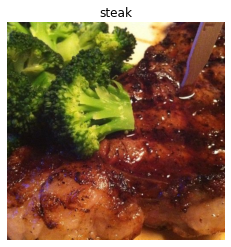

In [38]:
img=view_random_image(target_dir="pizza_steak/train/",target_class="steak")

Image shape: (384, 512, 3)


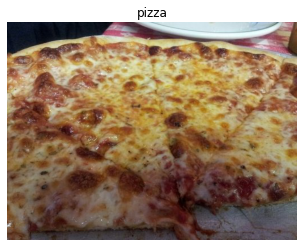

In [37]:
img=view_random_image(target_dir="pizza_steak/train/",target_class="pizza")

In [24]:
import tensorflow as tf
tf.constant(img,dtype=tf.float32)

<tf.Tensor: shape=(512, 512, 3), dtype=float32, numpy=
array([[[118., 116., 119.],
        [120., 118., 121.],
        [123., 121., 124.],
        ...,
        [ 42.,  38.,  27.],
        [ 41.,  37.,  26.],
        [ 40.,  36.,  25.]],

       [[121., 119., 122.],
        [123., 121., 124.],
        [125., 123., 126.],
        ...,
        [ 41.,  37.,  26.],
        [ 38.,  34.,  23.],
        [ 37.,  33.,  22.]],

       [[125., 123., 126.],
        [125., 123., 126.],
        [127., 125., 128.],
        ...,
        [ 45.,  41.,  30.],
        [ 41.,  37.,  26.],
        [ 39.,  35.,  24.]],

       ...,

       [[111., 110.,  27.],
        [110., 108.,  21.],
        [109., 108.,  15.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[116., 114.,  39.],
        [105., 104.,  22.],
        [103., 102.,  12.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[119., 11

In [25]:
# Build CNN network
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception

conv_base=Xception(weights='imagenet',
                   include_top=False,
                   input_shape=(299,299,3))

# set seed
tf.random.set_seed(42)

#Image proprocessing
train_datagen =ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

valid_datagen =ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

# Setup paths for data directories
train_dir="pizza_steak/train"
test_dir="pizza_steak/test"

# Import data from directories
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(299,299),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(299,299),
                                               class_mode="binary",
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [27]:
model=tf.keras.models.Sequential()
model.add(conv_base)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 flatten_2 (Flatten)         (None, 204800)            0         
                                                                 
 dense_2 (Dense)             (None, 1)                 204801    
                                                                 
Total params: 21,066,281
Trainable params: 21,011,753
Non-trainable params: 54,528
_________________________________________________________________


In [28]:
model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=7.0795e-04),
              metrics=["accuracy"])

In [30]:
callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', #val_loss
                                                factor=0.5,
                                                patience=3,
                                                min_lr=1e-5),
           tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                            patience=5),
           tf.keras.callbacks.ModelCheckpoint(filepath='my_model.h5',
                                              monitor='val_accuracy',
                                              save_best_only=True)]

In [31]:
history=model.fit(train_data,
          epochs=100,
          steps_per_epoch=len(train_data), # len(train_data) - number of batches
          validation_data=valid_data,
          validation_steps=len(valid_data),
          callbacks=callbacks) 

Epoch 1/100
47/47 [==============================] - ETA: 0s - loss: 0.4405 - accuracy: 0.8733

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


47/47 [==============================] - 141s 3s/step - loss: 0.4405 - accuracy: 0.8733 - val_loss: 0.3202 - val_accuracy: 0.9760 - lr: 7.0795e-04
Epoch 2/100
47/47 [==============================] - 125s 3s/step - loss: 0.1243 - accuracy: 0.9560 - val_loss: 0.2969 - val_accuracy: 0.9860 - lr: 7.0795e-04
Epoch 3/100
47/47 [==============================] - 125s 3s/step - loss: 0.1559 - accuracy: 0.9433 - val_loss: 0.4639 - val_accuracy: 0.9500 - lr: 7.0795e-04
Epoch 4/100
47/47 [==============================] - 124s 3s/step - loss: 0.1127 - accuracy: 0.9600 - val_loss: 0.9877 - val_accuracy: 0.8900 - lr: 7.0795e-04
Epoch 5/100
47/47 [==============================] - 124s 3s/step - loss: 0.0785 - accuracy: 0.9667 - val_loss: 0.1118 - val_accuracy: 0.9800 - lr: 7.0795e-04
Epoch 6/100
47/47 [==============================] - 124s 3s/step - loss: 0.0273 - accuracy: 0.9880 - val_loss: 0.0766 - val_accuracy: 0.9840 - lr: 3.5397e-04
Epoch 7/100
47/47 [==============================] - 122s 

In [32]:
print(history.history.keys())
#pd.DataFrame(history.history).plot()
#plt.ylabel("loss")
#plt.xlabel("epochs")
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


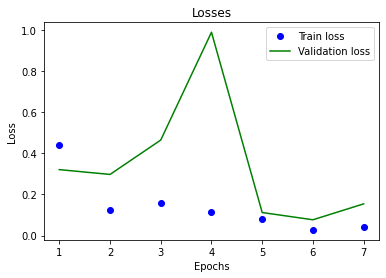

In [33]:
plt.plot(epochs,loss,'bo',label='Train loss')
plt.plot(epochs,val_loss,'g',label='Validation loss')
plt.title('Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

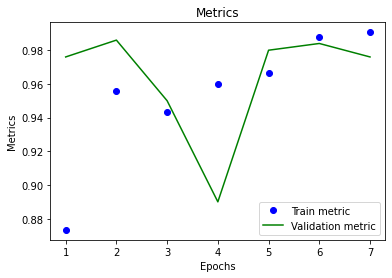

In [34]:
plt.plot(epochs,acc,'bo',label='Train metric')
plt.plot(epochs,val_acc,'g',label='Validation metric')
plt.title('Metrics')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend();